In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector
import numpy as np

# Established a connection with MySQL database
db = mysql.connector.connect(
        host="localhost",
        user="root",
        password="Ubeid@123",
        database="ecommerce")

cur = db.cursor()
# Created a cursor object to interact with the database

# List all unique cities where customers are located.

In [56]:
# SQL query to select distinct customer cities
query = """SELECT DISTINCT customer_city FROM customers"""

# Execute the SQL query
cur.execute(query)

# Fetch all unique customer cities from the executed query
data = cur.fetchall()

# Display the fetched data
data


[('franca',),
 ('sao bernardo do campo',),
 ('sao paulo',),
 ('mogi das cruzes',),
 ('campinas',),
 ('jaragua do sul',),
 ('timoteo',),
 ('curitiba',),
 ('belo horizonte',),
 ('montes claros',),
 ('rio de janeiro',),
 ('lencois paulista',),
 ('caxias do sul',),
 ('piracicaba',),
 ('guarulhos',),
 ('pacaja',),
 ('florianopolis',),
 ('aparecida de goiania',),
 ('santo andre',),
 ('goiania',),
 ('cachoeiro de itapemirim',),
 ('sao jose dos campos',),
 ('sao roque',),
 ('camacari',),
 ('resende',),
 ('sumare',),
 ('novo hamburgo',),
 ('sao luis',),
 ('sao jose',),
 ('santa barbara',),
 ('ribeirao preto',),
 ('ituiutaba',),
 ('taquarituba',),
 ('sao jose dos pinhais',),
 ('barrinha',),
 ('parati',),
 ('dourados',),
 ('trindade',),
 ('cascavel',),
 ('fortaleza',),
 ('brasilia',),
 ('pelotas',),
 ('porto alegre',),
 ('salto',),
 ('jundiai',),
 ('cacapava',),
 ('sao vicente',),
 ('uberlandia',),
 ('botelhos',),
 ('sao goncalo',),
 ('araucaria',),
 ('nova iguacu',),
 ('areia branca',),
 ('campo

# Count the number of orders placed in 2017.

In [57]:
# SQL query to count the number of orders placed in 2017
query = """SELECT COUNT(*) AS NumberOfOrders FROM orders WHERE YEAR(order_purchase_timestamp) = 2017"""

# Execute the SQL query
cur.execute(query)

# Fetch the count of orders placed in 2017
data = cur.fetchall()

# Print the total number of orders placed in 2017
print("Total orders placed in 2017 are:", data[0][0])


Total orders placed in 2017 are: 45101


# Find the total sales per category.

In [43]:
# SQL query to get total sales per product category
query = """SELECT products.product_category AS category, ROUND(SUM(payments.payment_value), 2) AS sales
FROM products 
INNER JOIN order_items ON products.product_id = order_items.product_id 
INNER JOIN payments ON payments.order_id = order_items.order_id 
GROUP BY category"""

# Execute the SQL query
cur.execute(query)

# Fetch the results from the executed query
data = cur.fetchall()

# Create a DataFrame from the fetched data with specified column names
df = pd.DataFrame(data, columns=["Category", "Sales"])

# Display the DataFrame
df


,Category,Sales
0,perfumery,506738.66
1,Furniture Decoration,1430176.39
2,telephony,486882.05
3,bed table bath,1712553.67
4,automotive,852294.33
...,...,...
69,cds music dvds,1199.43
70,La Cuisine,2913.53
71,Fashion Children's Clothing,785.67
72,PC Gamer,2174.43


# Calculate the percentage of orders that were paid in installments.

In [48]:
# SQL query to calculate the percentage of orders paid in installments
query = """SELECT SUM(payment_installments >= 1) / COUNT(*) * 100 AS Installments_percentage FROM payments """

cur.execute(query)

data = cur.fetchall()
# Print the percentage of orders paid in installments
print("The percentage of orders where paid in installments is:", data[0][0])

The percentage of orders where paid in installments is: 99.9981


# Count the number of customers from each state. 

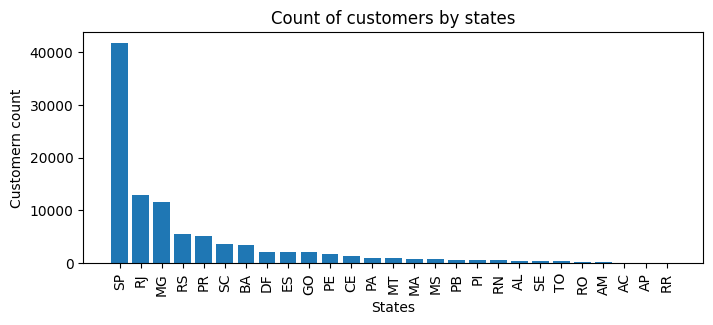

In [63]:
# SQL query to count customers per state and group by customer_state
query = """SELECT customer_state, COUNT(customer_id) AS customer_count FROM customers GROUP BY customer_state"""

# Execute the SQL query
cur.execute(query)

# Fetch the results from the executed query
data = cur.fetchall()

# Create DataFrame with specified column names
df = pd.DataFrame(data, columns=["State", "Customer_count"])
df = df.sort_values(by="Customer_count", ascending=False)

# Plotting the data
plt.figure(figsize=(8, 3))  # Set the size of the figure
plt.bar(df["State"], df["Customer_count"])  # Create a bar plot with states and customer counts
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.xlabel("States")
plt.ylabel("Customern count")
plt.title("Count of customers by states") 
plt.show()  # Display the plot

# Calculate the number of orders per month in 2018.

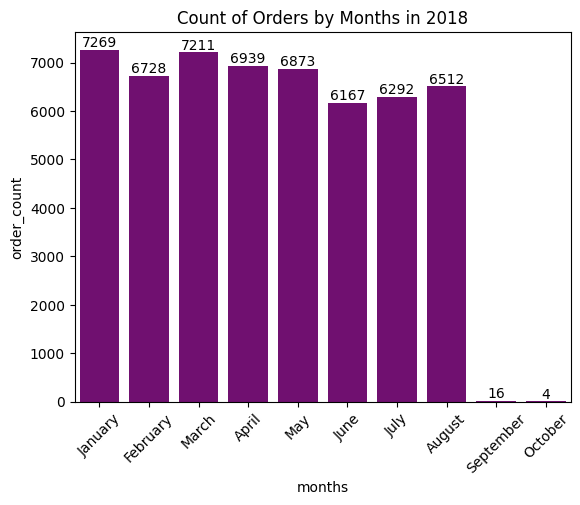

In [81]:
query = """SELECT monthname(order_purchase_timestamp) AS months, COUNT(order_id) AS customer_count FROM orders WHERE YEAR(order_purchase_timestamp) = 2018 GROUP BY months """

cur.execute(query)
data = cur.fetchall()

# Create a DataFrame from the fetched data
df = pd.DataFrame(data, columns = ["months", "order_count"])

# Define the order of months for the bar plot
o = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October"]

# Create the bar plot using seaborn
ax = sns.barplot(x = df["months"], y = df["order_count"], data = df, order = o, color = "purple")

# Rotate the x-axis labels for better readability
plt.xticks(rotation = 45)

# Add labels to the bars
ax.bar_label(ax.containers[0])

# Add a title to the plot
plt.title("Count of Orders by Months in 2018")

# Display the plot
plt.show()

# Find the average number of products per order, grouped by customer city.

In [86]:
query = """WITH count_per_order AS
(
SELECT orders.order_id, orders. customer_id, COUNT(order_items.order_id) AS oc
FROM orders JOIN order_items ON orders.order_id = order_items.order_id
GROUP BY orders.order_id, orders.customer_id
)
SELECT customers.customer_city, ROUND(AVG(count_per_order.oc), 2) AS average_orders
FROM customers JOIN count_per_order ON customers.customer_id = count_per_order.customer_id
GROUP BY customers.customer_city; """

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["Customer_city", "average_products/orders"])
df.head(10) #shows top 10 


,Customer_city,average_orders
0,sao paulo,1.16
1,sao jose dos campos,1.14
2,porto alegre,1.17
3,indaial,1.12
4,treze tilias,1.27
5,rio de janeiro,1.15
6,mario campos,1.33
7,guariba,1.00
8,cuiaba,1.20
9,franca,1.25


# Calculate the percentage of total revenue contributed by each product category.

In [88]:
query = """SELECT UPPER(products.product_category) AS category, 
ROUND(SUM(payments.payment_value)/(SELECT SUM(payment_value) FROM payments)*100,2) As sales_percentage
FROM products INNER JOIN order_items ON products.product_id = order_items.product_id 
INNER JOIN payments ON payments.order_id = order_items.order_id 
GROUP BY category ORDER BY sales_percentage DESC"""

cur.execute(query)

data = cur.fetchall()
df = pd.DataFrame(data, columns = ["Products Category", "Percentage distribution"])
df

,Products Category,percentage
0,BED TABLE BATH,10.70
1,HEALTH BEAUTY,10.35
2,COMPUTER ACCESSORIES,9.90
3,FURNITURE DECORATION,8.93
4,WATCHES PRESENT,8.93
...,...,...
69,HOUSE COMFORT 2,0.01
70,CDS MUSIC DVDS,0.01
71,PC GAMER,0.01
72,FASHION CHILDREN'S CLOTHING,0.00


# Identify the correlation between product price and the number of times a product has been purchased.

In [98]:
query = """SELECT products.product_category, COUNT(products.product_id) AS product_count, 
ROUND(AVG(order_items.price),2) AS average_item_price FROM order_items JOIN products 
ON order_items.product_id = products.product_id GROUP BY products.product_category;"""

cur.execute(query)

data = cur.fetchall()
df = pd.DataFrame(data, columns = ["Counr", "order_count", "price"])

arr1 = df["order_count"]
arr2 = df["price"]

a = np.corrcoef([arr1,arr2])
print("the correlation is:", a[0][-1])

the correlation is: -0.10631514167157562


#  Calculate the total revenue generated by each seller, and rank them by revenue.


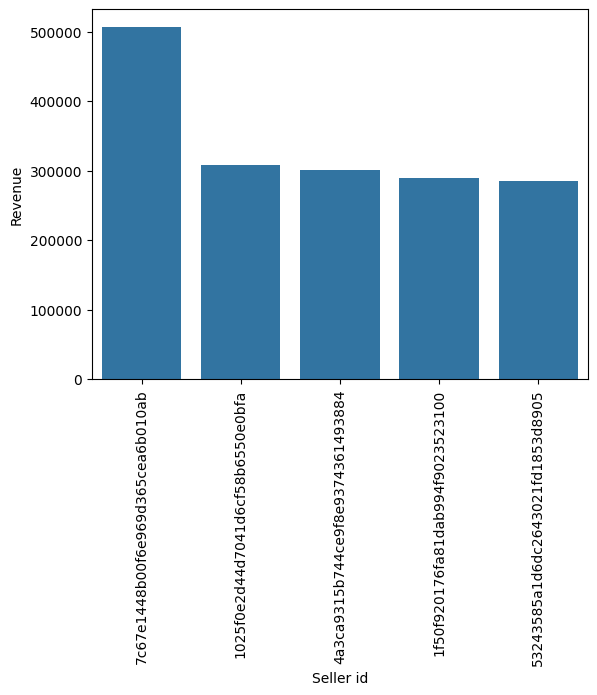

In [110]:
query = """WITH SellerRevenue AS (
    SELECT order_items.seller_id, ROUND(SUM(payments.payment_value), 2) AS revenue 
    FROM order_items JOIN payments ON order_items.order_id = payments.order_id 
    GROUP BY order_items.seller_id)
SELECT seller_id, revenue, DENSE_RANK() OVER (ORDER BY revenue DESC) AS ranks
FROM SellerRevenue;"""

cur.execute(query)

data = cur.fetchall()
df = pd.DataFrame(data, columns = ["Seller id", "Revenue", "Ranks"])
df = df.head()

sns.barplot (x = "Seller id", y = "Revenue", data = df)
plt.xticks(rotation = 90)
plt.show()

# Calculate the moving average of order values for each customer over their order history.

In [119]:
query = """SELECT customer_id, order_purchase_timestamp, payment, AVG(payment)
OVER(partition by customer_id ORDER BY order_purchase_timestamp 
ROWS BETWEEN 2 PRECEDING AND CURRENT ROW) AS move_avg 
FROM(
SELECT orders.customer_id, orders.order_purchase_timestamp, payments.payment_value AS payment
FROM orders JOIN payments ON orders.order_id = payments.order_id
) AS a"""

cur.execute(query)

data = cur.fetchall()
df = pd.DataFrame(data, columns = ["customer_id", "purchase_timestamp", "price", "moving_ average"])
df = df.head()
df


,customer_id,purchase_timestamp,price,moving_ average
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
1,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,67.41,67.410004
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43,195.42,195.419998
3,0002414f95344307404f0ace7a26f1d5,2017-08-16 13:09:20,179.35,179.350006
4,000379cdec625522490c315e70c7a9fb,2018-04-02 13:42:17,107.01,107.010002


# Calculate the cumulative sales per month for each year.

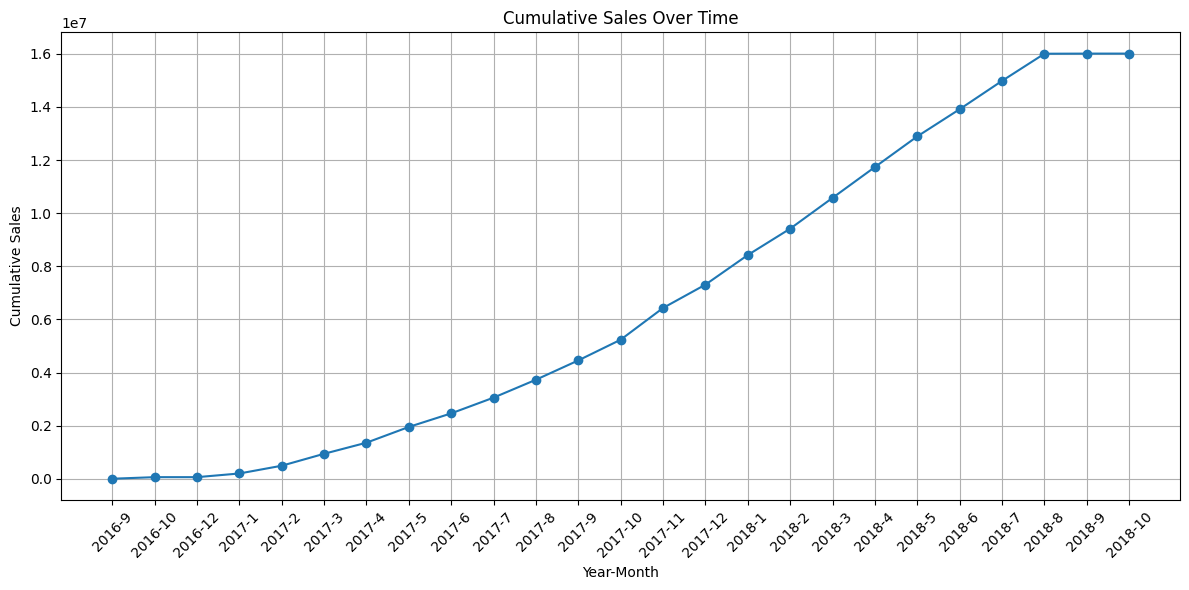

In [124]:
query = """SELECT years, months, payment, SUM(payment)
OVER(ORDER BY years, months) AS cumulative_sales FROM
(SELECT YEAR(orders.order_purchase_timestamp) AS years,
MONTH(orders.order_purchase_timestamp) AS months,
ROUND(SUM(payments.payment_value),2) AS payment
FROM orders JOIN payments ON orders.order_id = payments.order_id
GROUP BY years, months ORDER BY years, months) AS a"""

cur.execute(query)

data = cur.fetchall()
df = pd.DataFrame(data, columns = ["years", "months", "payments", "cumulative sales"])

# Plotting the data 
plt.figure(figsize=(12, 6)) 
#This creates labels like 2018-1, 2018-2
plt.plot(df["years"].astype(str) + '-' + df["months"].astype(str), df["cumulative sales"], marker='o')
plt.xlabel('Year-Month') 
plt.ylabel('Cumulative Sales') 
plt.title('Cumulative Sales Over Time') 
plt.xticks(rotation=45) 
plt.grid(True) 
plt.tight_layout() 
plt.show()

#  Calculate the year-over-year growth rate of total sales.

In [137]:
query = """WITH a AS(SELECT YEAR(orders.order_purchase_timestamp) AS years,
ROUND(SUM(payments.payment_value),2) AS payment
FROM orders JOIN payments ON orders.order_id = payments.order_id
GROUP BY years ORDER BY years)

SELECT years, ((payment - LAG(payment, 1) OVER(ORDER BY years))/
LAG(payment, 1) OVER(ORDER BY years)) * 100   FROM a"""

cur.execute(query)

data = cur.fetchall()
df = pd.DataFrame(data, columns = ["years", "yoy % growth"])
df

,years,yoy % growth
0,2016,NaN
1,2017,12112.703761
2,2018,20.000924


# Calculate the retention rate of customers, defined as the percentage of customers who make another purchase within 6 months of their first purchase.


In [138]:
query = """with a as (select customers.customer_id,
min(orders.order_purchase_timestamp) first_order
from customers join orders
on customers.customer_id = orders.customer_id
group by customers.customer_id),

b as (select a.customer_id, count(distinct orders.order_purchase_timestamp) next_order
from a join orders
on orders.customer_id = a.customer_id
and orders.order_purchase_timestamp > first_order
and orders.order_purchase_timestamp < 
date_add(first_order, interval 6 month)
group by a.customer_id) 

select 100 * (count( distinct a.customer_id)/ count(distinct b.customer_id)) 
from a left join b 
on a.customer_id = b.customer_id ;"""

cur.execute(query)
data = cur.fetchall()

data #SInce none of our customer is repeated thats why our value is none

[(None,)]

#  Identify the top 3 customers who spent the most money in each year.

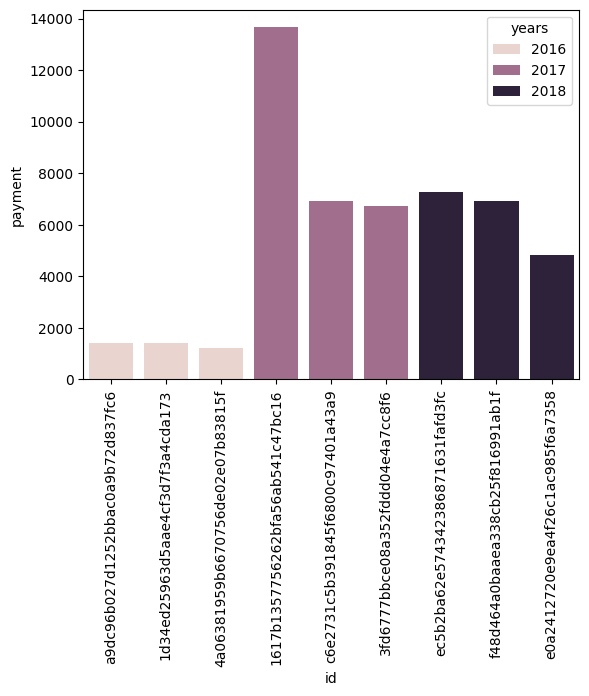

In [147]:
query = """select years, customer_id, payment, d_rank
from
(select year(orders.order_purchase_timestamp) years,
orders.customer_id,
sum(payments.payment_value) payment,
dense_rank() over(partition by year(orders.order_purchase_timestamp)
order by sum(payments.payment_value) desc) d_rank
from orders join payments 
on payments.order_id = orders.order_id
group by year(orders.order_purchase_timestamp),
orders.customer_id) as a
where d_rank <= 3 ;"""

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["years","id","payment","rank"])
sns.barplot(x = "id", y = "payment", data = df, hue = "years")
plt.xticks(rotation = 90)
plt.show()